In [2]:
import pandas as pd

In [3]:
test_data = pd.read_csv("mnist_test.csv", header = None)

In [4]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.shape

(10000, 785)

In [34]:
image_row = test_data.values[8,1:]


In [33]:
image_row.shape

(784,)

In [36]:
image_matrix = image_row.reshape(28,28) # делаем матрицу 28 * 28

In [10]:
import matplotlib.pyplot as plt

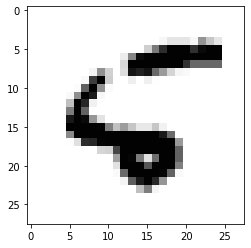

In [37]:
plt.imshow(image_matrix, cmap = "Greys") # color map

In [23]:
mnist_test = pd.read_csv("mnist_test.csv", header = None)
mnist_train = pd.read_csv("mnist_train.csv", header = None)

In [26]:
mnist_test.shape

(10000, 785)

In [107]:
mnist_train.shape

(60000, 785)

In [28]:
mnist_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i + 1))

In [105]:
mnist_train.columns = cols
mnist_test.columns = cols


In [106]:
mnist_train.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
train_data = mnist_train.values[:, 1:]
test_data = mnist_test.values[:, 1:]

In [135]:
train_label = mnist_train.values[:, 0]
test_label = mnist_test.values[:, 0]

In [136]:
print(train_data.shape, test_data.shape)


(60000, 784) (10000, 784)


In [137]:
print(train_label.shape, test_label.shape)


(60000,) (10000,)


In [130]:
kn_classifier = KNeighborsClassifier(n_jobs=-1)

In [131]:
kn_classifier = kn_classifier.fit(train_data, train_label)

Number ---> 6


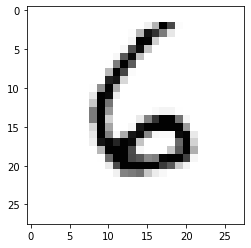

In [151]:
test_id = 600
plt.imshow(test_data[test_id, :].reshape(28,28), cmap="Greys")
print("Number ---> {}".format(test_label[test_id]))

In [152]:
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([6], dtype=int64)

In [153]:
from sklearn.metrics import accuracy_score # точность погрешность

In [154]:
kn_predictions = kn_classifier.predict(test_data)

In [155]:
print("Accuracy: {}%".format(accuracy_score(test_label,kn_predictions)*100))

Accuracy: 96.88%


In [156]:
accuracy_score(test_label,kn_predictions)*10000

9688.0

In [ ]:
#Нейронная сеть1

In [158]:
from sklearn.neural_network import MLPClassifier

In [159]:
mlp_classifier = MLPClassifier(verbose=True) #1 со параметрами по умолчанию и выдачей отладочой информации

In [160]:
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 3.19937119
Iteration 2, loss = 0.81983874
Iteration 3, loss = 0.42889248
Iteration 4, loss = 0.29652338
Iteration 5, loss = 0.22984933
Iteration 6, loss = 0.19008840
Iteration 7, loss = 0.16473312
Iteration 8, loss = 0.14300820
Iteration 9, loss = 0.12908472
Iteration 10, loss = 0.11760106
Iteration 11, loss = 0.11980036
Iteration 12, loss = 0.11216353
Iteration 13, loss = 0.10280167
Iteration 14, loss = 0.10123152
Iteration 15, loss = 0.10156509
Iteration 16, loss = 0.09603060
Iteration 17, loss = 0.10120570
Iteration 18, loss = 0.08862147
Iteration 19, loss = 0.09727700
Iteration 20, loss = 0.09186233
Iteration 21, loss = 0.08375433
Iteration 22, loss = 0.08004506
Iteration 23, loss = 0.08086185
Iteration 24, loss = 0.07490984
Iteration 25, loss = 0.07287142
Iteration 26, loss = 0.07256508
Iteration 27, loss = 0.07127534
Iteration 28, loss = 0.06111805
Iteration 29, loss = 0.05708870
Iteration 30, loss = 0.06420475
Iteration 31, loss = 0.06005957
Iteration 32, los

Number ---> 4


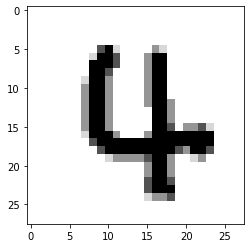

In [165]:
test_id = 1023
plt.imshow(test_data[test_id, :].reshape(28,28), cmap="Greys")
print("Number ---> {}".format(test_label[test_id]))

In [166]:
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([4], dtype=int64)

In [167]:
mlp_predictions = mlp_classifier.predict(test_data)

In [168]:
print("Accuracy: {}%".format(accuracy_score(test_label,mlp_predictions)*100))

Accuracy: 96.21%


In [174]:
#Нейронная сеть2

mlp_classifier2 = MLPClassifier(hidden_layer_sizes = (200,) ,verbose=True) #2 200 слоев, выдачей отладочой информации
mlp_classifier2 = mlp_classifier2.fit(train_data, train_label)



Iteration 1, loss = 2.79015190
Iteration 2, loss = 0.80907637
Iteration 3, loss = 0.44832098
Iteration 4, loss = 0.28079507
Iteration 5, loss = 0.20787459
Iteration 6, loss = 0.14640069
Iteration 7, loss = 0.12439525
Iteration 8, loss = 0.13720380
Iteration 9, loss = 0.11075394
Iteration 10, loss = 0.10694814
Iteration 11, loss = 0.11697103
Iteration 12, loss = 0.09994891
Iteration 13, loss = 0.10674509
Iteration 14, loss = 0.08414243
Iteration 15, loss = 0.09731008
Iteration 16, loss = 0.10629512
Iteration 17, loss = 0.10575947
Iteration 18, loss = 0.08295405
Iteration 19, loss = 0.09568938
Iteration 20, loss = 0.09138883
Iteration 21, loss = 0.08828717
Iteration 22, loss = 0.07854370
Iteration 23, loss = 0.07552151
Iteration 24, loss = 0.08216517
Iteration 25, loss = 0.08753013
Iteration 26, loss = 0.08711871
Iteration 27, loss = 0.08124096
Iteration 28, loss = 0.07595090
Iteration 29, loss = 0.08324333
Iteration 30, loss = 0.06808776
Iteration 31, loss = 0.07046462
Iteration 32, los

Number ---> 4


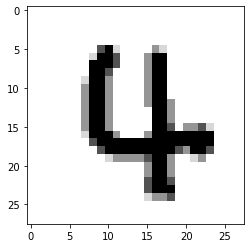

In [176]:
test_id = 1023
plt.imshow(test_data[test_id, :].reshape(28,28), cmap="Greys")
print("Number ---> {}".format(test_label[test_id]))

In [177]:
mlp_classifier2.predict(test_data[test_id, :].reshape(1, 784))

array([4], dtype=int64)

In [178]:
mlp_predictions2 = mlp_classifier2.predict(test_data)
print("Accuracy: {}%".format(accuracy_score(test_label,mlp_predictions2)*100))

Accuracy: 97.43%


In [179]:
list_1 = [1,2,3,4,5]
list_2 = [1,'1',2,'2',6,'6']

In [183]:
list(set(list_2) - set(list_1))

['2', '6', 6, '1']

In [184]:
set(list_2)

{1, '1', 2, '2', 6, '6'}

In [185]:
set(list_1)

{1, 2, 3, 4, 5}

In [186]:
1/3

0.3333333333333333

In [192]:
[1,-1]

[1, -1]